In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

ts.set_token('35d8848b876df93910413e8936c40745d7b7da42553ae73920862cd9')
pro = ts.pro_api()

In [62]:
news = pro.news(src='sina', start_date='2019-06-01 00:00:00', end_date='2019-06-24 23:59:59')
news.head()

,datetime,content,title
0,2019-06-24 23:56:05,360金融跌幅扩大至25%以上，现报10.32美元。,
1,2019-06-24 23:53:38,美元兑日元交投于平盘水平。,
2,2019-06-24 23:53:00,WTI原油期货跌1.2%，暂报57.00美元/桶，徘徊于日低56.75美元附近/桶。美国总统...,
3,2019-06-24 23:46:42,【欧股收盘涨跌互现】欧股周一收盘涨跌互现，德国DAX30指数收跌0.58%，报12268...,
4,2019-06-24 23:46:02,【高通可能再度面临欧盟罚款 具体时间未定】据外媒援引三位知情人士，此前已经被罚款9.97...,


In [67]:
# 由于title和content同时在content中，因此需要数据预处理将其分离
news_title = []
news_content = []

for content in news.content:
    tc = content.split('】') if '】' in content[1:] else ["", content]
    news_title.append(tc[0])
    news_content.append(tc[1])

### 生成新闻内容词云

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/wordcloud/wordcloud.py:995: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


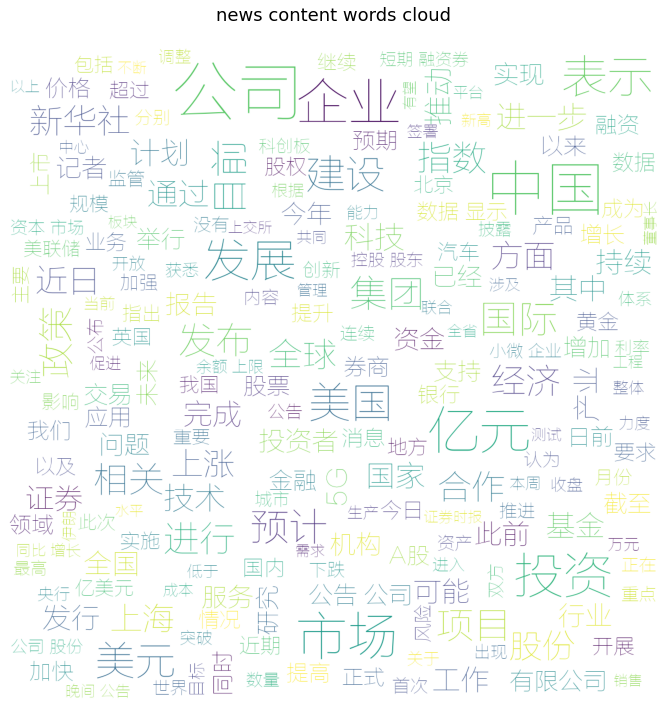

In [64]:
# 对新闻内容进行分词
content_list = [" ".join(jieba.cut(sentence)) for sentence in news_content]
news_content_text = ' '.join(content_list)

# 读取背景图
img = plt.imread("images/bg.png")

# 设置词云格式
wc = WordCloud(background_color="white", 
     mask=img,  # 设置背景图片
     max_font_size=120, # 字体最大值
     random_state=42,  # 颜色随机性
     font_path="font/FZLTCXHJW.TTF")  # 使用简体中文（否则图片文字显示异常）

# 生成词云
wc.generate(news_content_text)
image_colors = ImageColorGenerator(img)

# 设置图片大小
plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.title('news content words cloud\n',fontsize=18)
plt.axis("off")
plt.show()

# 将图片保存到本地
# wc.to_file("news content words cloud.jpg")

### 生成新闻标题词云

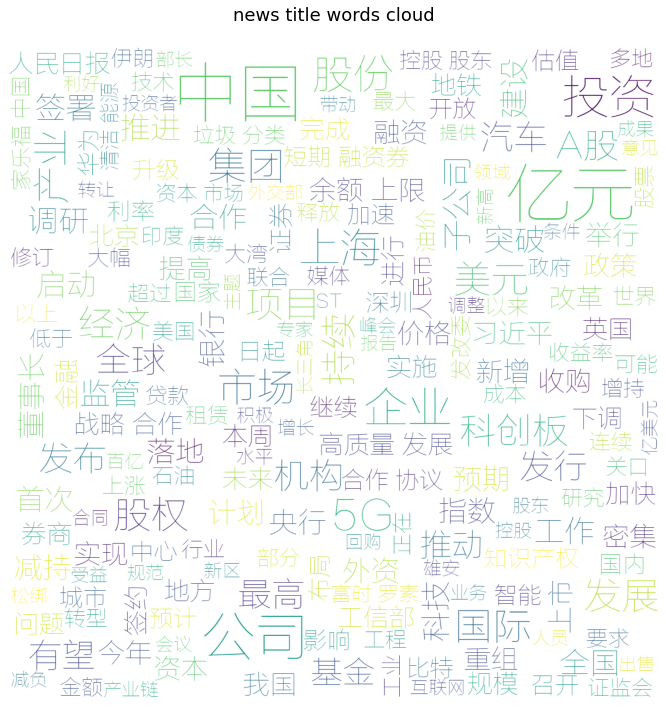

In [65]:
# 对新闻标题进行分词
title_list = [" ".join(jieba.cut(sentence)) for sentence in news_title]
news_title_text = ' '.join(title_list)

# 读取背景图
img = plt.imread("images/bg.png")

# 设置词云格式
wc = WordCloud(background_color="white", 
     mask=img,  # 设置背景图片
     max_font_size=120, # 字体最大值
     random_state=42,  # 颜色随机性
     font_path="font/FZLTCXHJW.TTF")  # 使用简体中文（否则图片文字显示异常）

# 生成词云
wc.generate(news_title_text)
image_colors = ImageColorGenerator(img)

# 设置图片大小
plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.title('news title words cloud\n',fontsize=18)
plt.axis("off")
plt.show()

# 将图片保存到本地
# wc.to_file("news title words cloud.jpg")

In [75]:
example_content = news.content[998]
example_content

'【国家发展改革委固定资产投资司2019年政府投资管理研究课题征集公告】近期，国务院颁布《政府投资条例》，自2019年7月1日起施行。为加快《条例》配套制度建设，确保《条例》顺利贯彻实施，国家发展改革委固定资产投资司启动2019年政府投资管理重大问题课题研究工作，现向社会公开征集课题研究单位。（发改委）'

In [82]:
# 设置分词黑名单
blacklist = ['个','文本','界面','的','目前']
blacklist = ['2019', '日起']

# 将某些固定词汇加入分词
stopwords = ['国家发展改革委']
for word in stopwords:
    jieba.add_word(word)

d = {} # 将词语转入字典
for word in jieba.cut(example_content):
    if word in blacklist:  # 根据黑名单过滤无关词语
        continue
    if len(word) < 2: # 去除单个字的词语
        continue
    d[word] = d.get(word, 0) + 1  # 记录词频
        
# 使用jieba.analyse提取句子级的关键字
d = ''.join(d)
tags = jieba.analyse.extract_tags(d,topK=100,withWeight=True)
tfs = dict((tag[0],tag[1]) for tag in tags)
for word,freq in tfs.items():
    print(f'{word}:{freq}')

国家发展改革委:0.373586484465625
投资司:0.373586484465625
现向:0.373586484465625
贯彻实施:0.345858259621875
研究课题:0.2937771244265625
征集:0.2554321845121875
课题:0.2434128222646875
施行:0.2363703725259375
固定资产:0.232524162425
条例:0.2303062507578125
配套:0.223791907019375
颁布:0.2190646416196875
发改委:0.218248832238125
顺利:0.207242422618125
确保:0.2060880506028125
国务院:0.2025218040096875
启动:0.1928831835040625
加快:0.1822585841690625
公开:0.1754502562246875
公告:0.1718334646990625
重大:0.168871602198125
单位:0.1675232804246875
近期:0.163877200149375
制度:0.1614663287690625
建设:0.153515041593125
管理:0.146070846869375
政府:0.142789711000625
社会:0.1402975356428125
研究:0.1351172378109375
工作:0.1313356044484375
问题:0.12385979915875
投资:0.1215679984934375


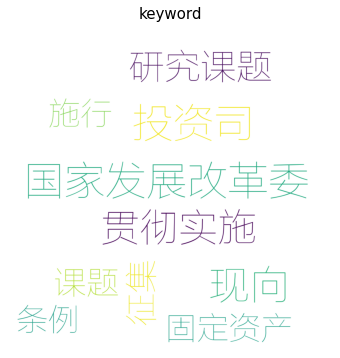

In [83]:
# 绘图
backgroud_Image = plt.imread("images/bg.png")

wc = WordCloud(
    background_color='white',
    mask=backgroud_Image,
    font_path="font/FZLTCXHJW.TTF",  
    max_words=10, # 设置最大现实的字数
    stopwords=STOPWORDS,# 设置停用词
    max_font_size=150,# 设置字体最大值
    random_state=30)
wc.generate_from_frequencies(tfs)
plt.figure(figsize=(6,6),facecolor='w',edgecolor='k')
plt.imshow(wc)
plt.title('keyword',fontsize=15)
plt.axis('off')
plt.show()

In [99]:
from snownlp import SnowNLP

def word_processing(text):
    # 数据清洗, 代码省略
    pass

def sentiment_score_list(dataset):
    # 数据处理和情绪判断主函数, 代码省略
    pass

def sentiment_score(senti_text):
    s1 = SnowNLP(senti_text)
    return s1.sentiments

# 选取前20条计算情绪得分
t1=list(news_content)
for content in list(news_content)[:20]:
    content = content.strip()
    print(f'{content[:10]}...:\t {sentiment_score(content)}')

360金融跌幅扩大至...:	 0.9741926140676507
美元兑日元交投于平盘...:	 0.42156755527685774
WTI原油期货跌1....:	 0.15637246714950637
欧股周一收盘涨跌互现...:	 0.764594724026011
据外媒援引三位知情人...:	 9.698727506246563e-05
意大利国家电力公司和...:	 0.1155131271619807
两油继续下行，布油跌...:	 0.0012285148980691885
美国财政部拍卖三个月...:	 0.34982929671727114
焦炭夜盘收跌0.89...:	 0.0007093143498021481
当地时间周一晚上11...:	 0.02784820935563248
欧元兑美元EUR/U...:	 0.3664558248392987
美元兑瑞郎刷新201...:	 0.8788036503346581
今日，网传一份长沙市...:	 0.0752303454914438
国际黄金日内涨超1%...:	 0.7613409199818135
美元兑瑞郎跌幅扩大至...:	 0.2928712173359562
人民银行市场司副司长...:	 0.9999894401898055
巴里克黄金震荡上行，...:	 0.43458064265261453
商品货币纽元兑美元上...:	 0.574582677817487
波罗的海干散货指数周...:	 4.901523258382667e-07
布伦特原油期货跌超1...:	 4.1891859392517716e-07
